In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./jfk_weather_cleaned.xls')


df.head()

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,01-01-2010 00:51,6.0,33,32,31,92,0,0,29.97,29.99,0.01
1,01-01-2010 01:51,6.0,33,33,32,96,0,0,29.97,29.99,0.02
2,01-01-2010 02:51,5.0,33,33,32,96,0,0,29.97,29.99,0.02
3,01-01-2010 03:51,5.0,33,33,32,96,0,0,29.95,29.97,0.02
4,01-01-2010 04:51,5.0,33,32,31,92,0,0,29.93,29.96,0.02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75083 entries, 0 to 75082
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              75083 non-null  object 
 1   VISIBILITY        75083 non-null  float64
 2   DRYBULBTEMPF      75083 non-null  int64  
 3   WETBULBTEMPF      75083 non-null  int64  
 4   DewPointTempF     75083 non-null  int64  
 5   RelativeHumidity  75083 non-null  int64  
 6   WindSpeed         75083 non-null  int64  
 7   WindDirection     75083 non-null  int64  
 8   StationPressure   75083 non-null  float64
 9   SeaLevelPressure  75083 non-null  float64
 10  Precip            75083 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 6.3+ MB


In [4]:
## checking for missing value
df.isna().sum()

DATE                0
VISIBILITY          0
DRYBULBTEMPF        0
WETBULBTEMPF        0
DewPointTempF       0
RelativeHumidity    0
WindSpeed           0
WindDirection       0
StationPressure     0
SeaLevelPressure    0
Precip              0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VISIBILITY,75083.0,9.211896,2.202311,0.00,10.00,10.00,10.00,14.00
DRYBULBTEMPF,75083.0,55.355527,17.394334,1.00,42.00,56.00,70.00,102.00
WETBULBTEMPF,75083.0,49.327544,16.182867,-1.00,36.00,50.00,64.00,85.00
DewPointTempF,75083.0,42.424024,19.577957,-19.00,27.00,44.00,59.00,84.00
RelativeHumidity,75083.0,64.812075,19.898962,8.00,49.00,66.00,82.00,100.00
WindSpeed,75083.0,11.253240,6.101048,0.00,7.00,10.00,15.00,53.00
WindDirection,75083.0,196.550751,107.692804,0.00,110.00,200.00,290.00,360.00
StationPressure,75083.0,30.005579,0.235172,28.52,29.86,30.00,30.15,30.83
SeaLevelPressure,75083.0,30.026049,0.234069,28.54,29.88,30.02,30.17,30.85
Precip,75083.0,0.005478,0.036161,0.00,0.00,0.00,0.00,2.41


In [6]:
# extraction of date
df['DATE'] = pd.to_datetime(df['DATE'])

df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.dayofweek
df['hour'] = df['DATE'].dt.hour

<AxesSubplot:>

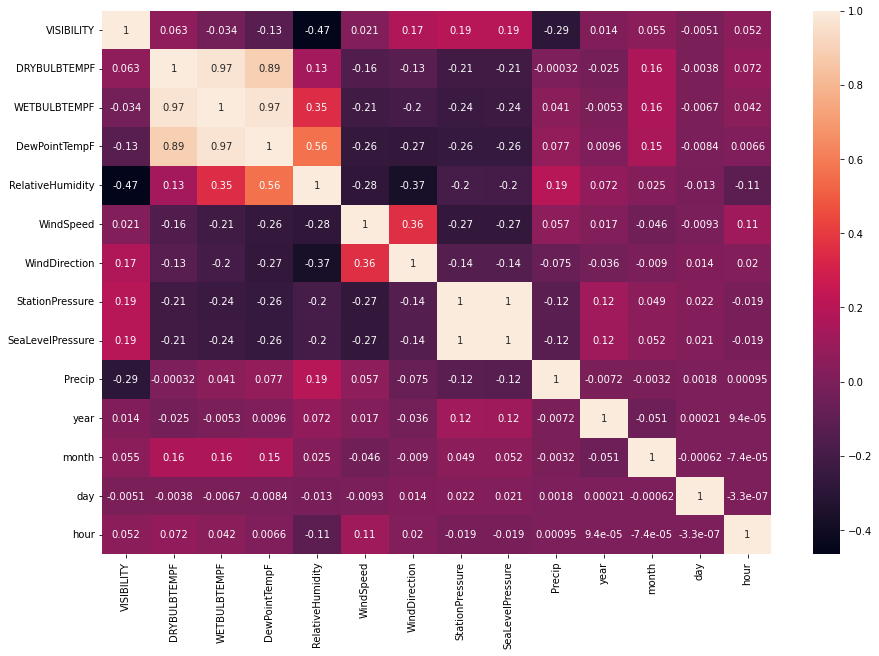

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)


In [8]:
##Using k-means clustering

from sklearn.decomposition import PCA

pca = PCA(n_components=14)
data = pca.fit_transform(df.drop(['DATE'],axis=1))
pc = pd.DataFrame(data=data,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14'])

In [9]:
pc.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14
0,196.060286,35.766154,-26.550937,-10.848586,-5.099162,-4.617918,4.568045,1.417043,0.856093,0.752971,1.694868,0.101325,-0.008690,-0.005122
1,196.429611,33.485410,-29.952795,-9.625059,-5.191234,-4.616430,4.578042,1.405665,0.841599,1.477580,1.453935,0.089077,-0.000358,-0.004580
2,196.431900,33.474965,-29.943347,-8.639361,-5.374607,-4.650281,4.718831,1.758220,1.705168,1.169950,1.360471,0.076092,-0.004178,-0.004151
3,196.430532,33.470175,-29.879867,-7.668093,-5.603782,-4.645179,4.721795,1.757673,1.704597,1.166258,1.364498,0.104354,-0.004358,-0.004064
4,196.058487,35.741459,-26.350964,-6.949235,-5.970689,-4.636201,4.716991,1.767862,1.717459,0.434124,1.611963,0.137891,-0.003023,-0.011802


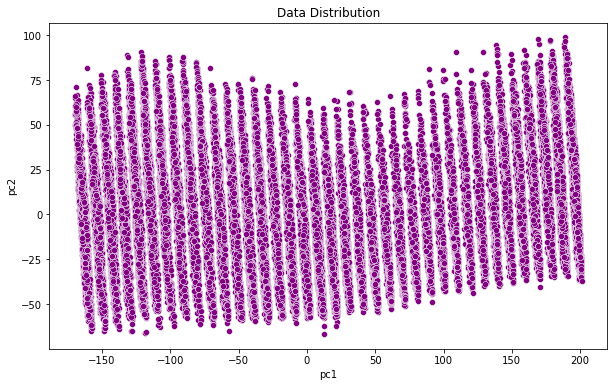

In [10]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=pc,x='pc1',y='pc2',color='purple')
plt.title('Data Distribution')
plt.savefig('count8.png')
     

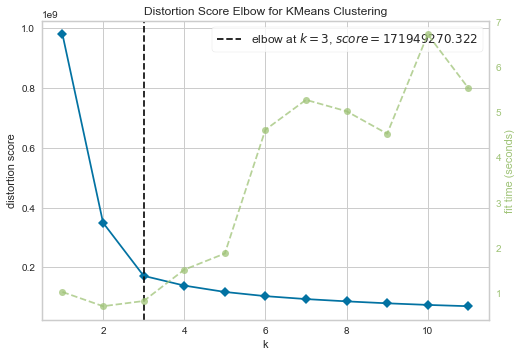

<Figure size 576x396 with 0 Axes>

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,12)).fit(pc)
visualizer.show()
plt.savefig('count9.png')

Observation

Chossing 3 as value of k

In [12]:
# training the model with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(pc)
     

KMeans(n_clusters=3)

In [13]:
# predicting the clusters
np.random.seed(42)
preds = kmeans.predict(pc)
     

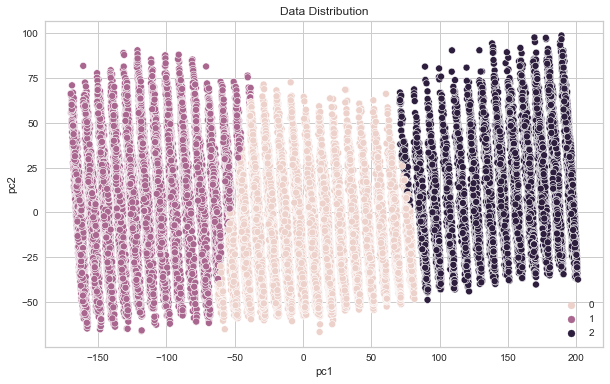

In [14]:
# plotting the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=pc['pc1'],y=pc['pc2'],hue=preds)
plt.title('Data Distribution')
plt.savefig('count10.png')
plt.show()
     
     

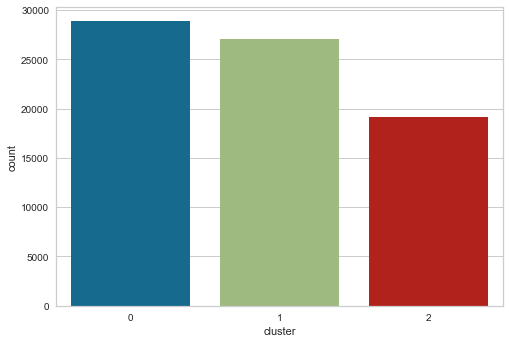

In [15]:

df['cluster'] = preds

sns.countplot(x = df['cluster'])
plt.savefig('count11.png')

In [16]:
df['cluster'].value_counts()/len(df)*100


0    38.449449
1    36.082735
2    25.467816
Name: cluster, dtype: float64

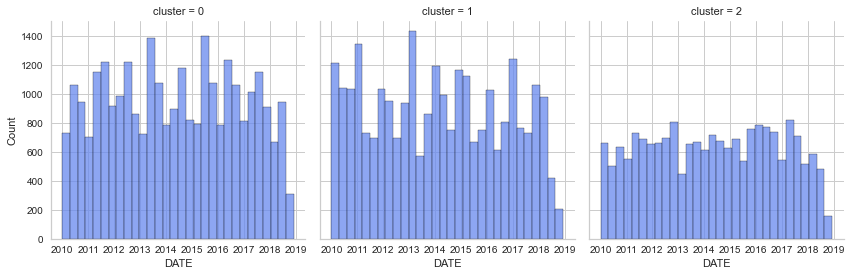

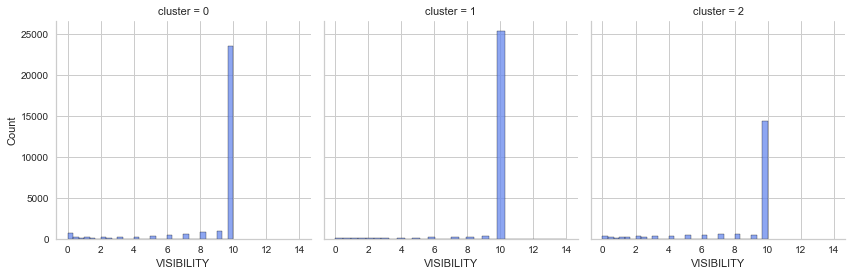

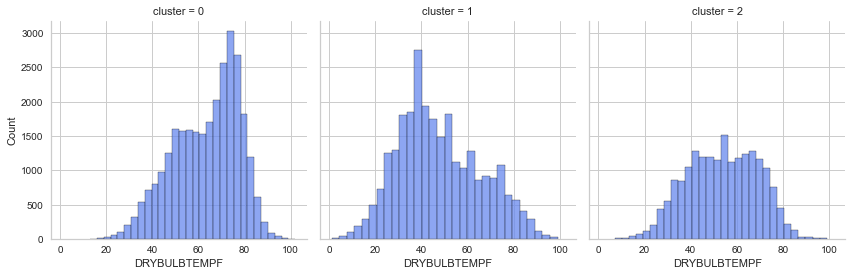

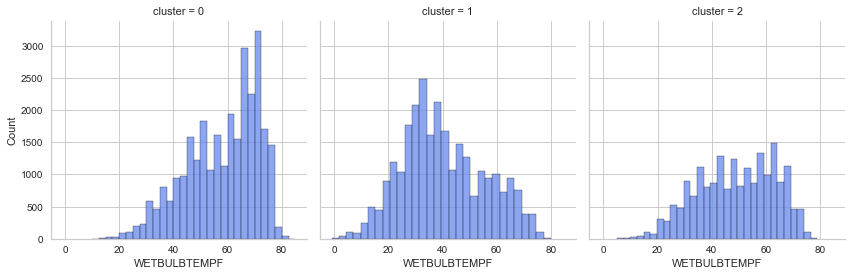

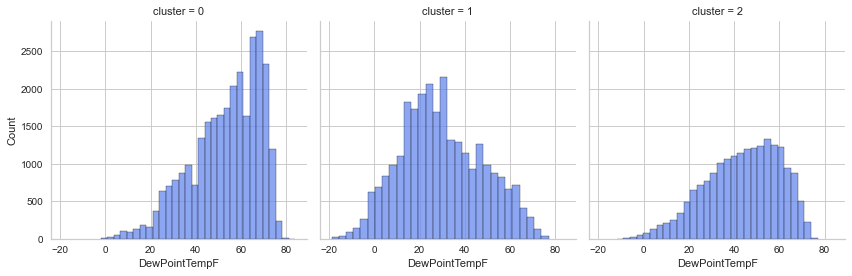

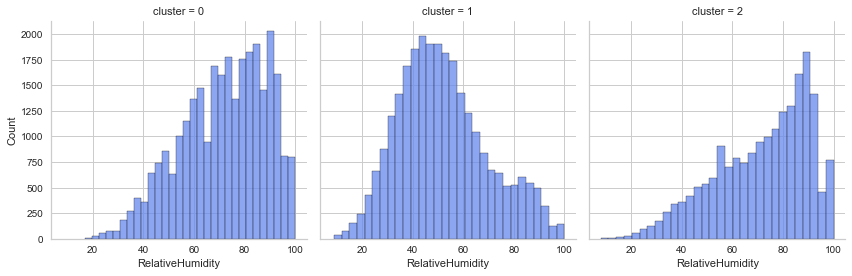

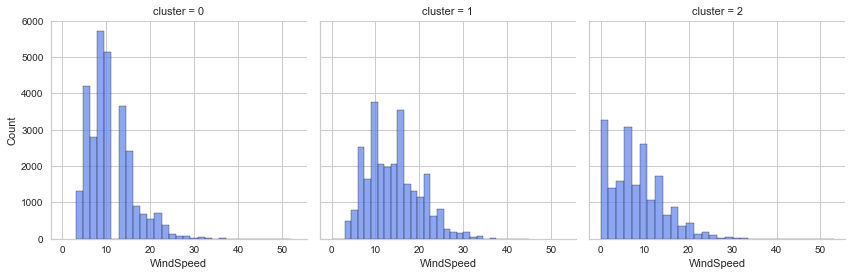

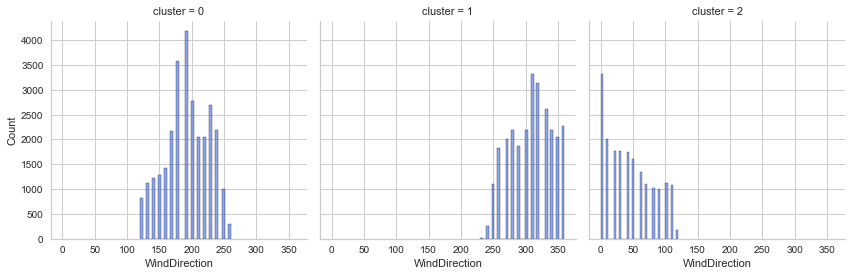

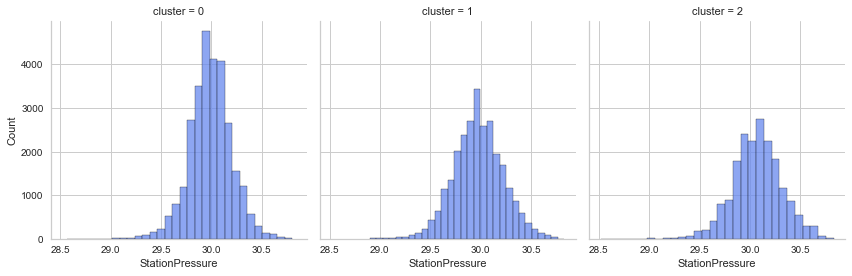

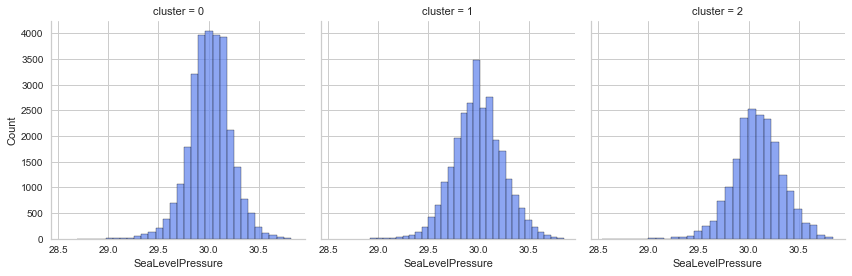

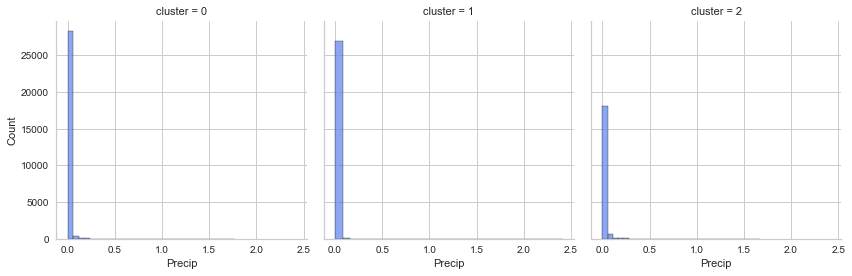

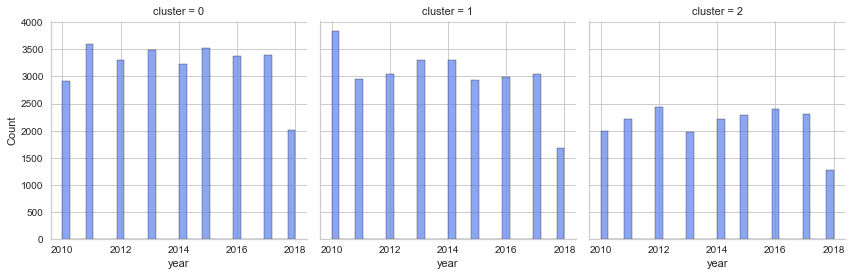

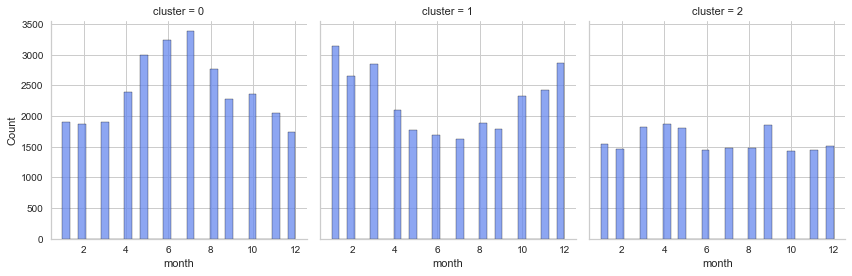

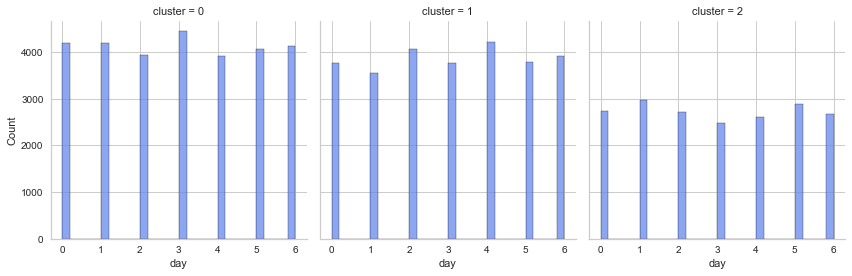

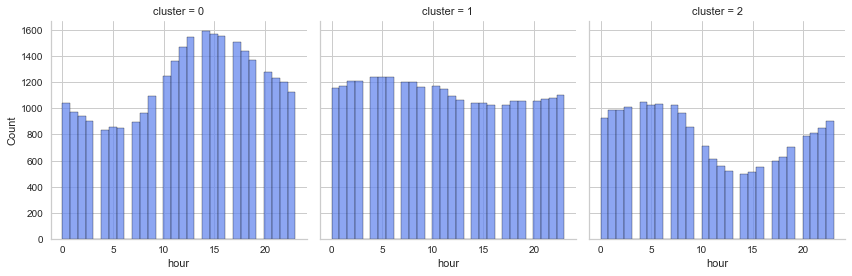

In [17]:
sns.set_palette('coolwarm')
for i in df.drop(['cluster'],axis=1):
    grid = sns.FacetGrid(df,height=4,col='cluster')
    grid = grid.map(sns.histplot,i,bins=30)
plt.show()
     

In [18]:
reg_data = df.loc[df['cluster'] == 2]
reg_data

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip,year,month,day,hour,cluster
0,2010-01-01 00:51:00,6.0,33,32,31,92,0,0,29.97,29.99,0.01,2010,1,4,0,2
1,2010-01-01 01:51:00,6.0,33,33,32,96,0,0,29.97,29.99,0.02,2010,1,4,1,2
2,2010-01-01 02:51:00,5.0,33,33,32,96,0,0,29.97,29.99,0.02,2010,1,4,2,2
3,2010-01-01 03:51:00,5.0,33,33,32,96,0,0,29.95,29.97,0.02,2010,1,4,3,2
4,2010-01-01 04:51:00,5.0,33,32,31,92,0,0,29.93,29.96,0.02,2010,1,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74959,2018-07-22 18:51:00,3.0,73,73,73,100,11,110,29.97,29.99,0.54,2018,7,6,18,2
75079,2018-07-27 19:51:00,4.0,69,69,69,100,13,40,29.99,30.01,1.16,2018,7,4,19,2
75080,2018-07-27 20:51:00,10.0,71,70,70,96,0,0,30.02,30.04,0.01,2018,7,4,20,2
75081,2018-07-27 21:51:00,10.0,72,71,70,94,5,50,30.00,30.02,0.01,2018,7,4,21,2


In [19]:

X = reg_data.drop(['DATE','VISIBILITY','WETBULBTEMPF','DewPointTempF','StationPressure'], axis=1)
y = reg_data['VISIBILITY']

In [20]:
X

,DRYBULBTEMPF,RelativeHumidity,WindSpeed,WindDirection,SeaLevelPressure,Precip,year,month,day,hour,cluster
0,33,92,0,0,29.99,0.01,2010,1,4,0,2
1,33,96,0,0,29.99,0.02,2010,1,4,1,2
2,33,96,0,0,29.99,0.02,2010,1,4,2,2
3,33,96,0,0,29.97,0.02,2010,1,4,3,2
4,33,92,0,0,29.96,0.02,2010,1,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...
74959,73,100,11,110,29.99,0.54,2018,7,6,18,2
75079,69,100,13,40,30.01,1.16,2018,7,4,19,2
75080,71,96,0,0,30.04,0.01,2018,7,4,20,2
75081,72,94,5,50,30.02,0.01,2018,7,4,21,2


In [21]:
y

0         6.0
1         6.0
2         5.0
3         5.0
4         5.0
         ... 
74959     3.0
75079     4.0
75080    10.0
75081    10.0
75082    10.0
Name: VISIBILITY, Length: 19122, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

print(X_train)

print(y_train)

print(X_test)

print(y_test)

       DRYBULBTEMPF  RelativeHumidity  WindSpeed  WindDirection  \
61271            33                58          0              0   
51590            45                46         11             30   
68967            43                76          9             20   
12362            77                58          9             30   
9986             31                85          8             70   
...             ...               ...        ...            ...   
37374            48                77         18             90   
52530            46                79          6             60   
39860            74                64         14            100   
43599            47                90         15             60   
11857            56                47         15             10   

       SeaLevelPressure  Precip  year  month  day  hour  cluster  
61271             30.16    0.00  2016     12    2    23        2  
51590             30.29    0.00  2015     11    5     7      

In [23]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)

print(X_test)

[[-1.37420403 -0.75223945 -1.3541928  ... -0.48499618  1.72537278
   0.        ]
 [-0.58453388 -1.4026984   0.44735568 ...  1.00266874 -0.49336178
   0.        ]
 [-0.71614557  0.22344897  0.11980141 ... -0.98088448  1.03201823
   0.        ]
 ...
 [ 1.32383564 -0.42700998  0.93868709 ...  1.49855705 -0.07734905
   0.        ]
 [-0.45292219  0.98231774  1.10246422 ... -0.98088448 -0.7707036
   0.        ]
 [ 0.13933042 -1.34849349  1.10246422 ... -0.48499618 -0.7707036
   0.        ]]
[[ 0.66577718 -0.75223945  0.93868709 ...  1.00266874 -1.18671633
   0.        ]
 [ 1.06061226 -0.91485419  0.11980141 ... -0.48499618 -0.63203269
   0.        ]
 [-0.71614557  0.76549809  0.28357855 ... -0.48499618 -0.07734905
   0.        ]
 ...
 [ 1.45544733  0.00662932 -1.3541928  ... -0.98088448 -0.63203269
   0.        ]
 [ 0.73158303  0.22344897 -1.3541928  ...  1.00266874 -0.7707036
   0.        ]
 [ 1.06061226 -1.67372296  0.11980141 ...  1.00266874  0.06132186
   0.        ]]


# Decision Tree Regressor

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

# Hyperparameter Tuning using GridSearchCV

param_grid = {
    'max_depth':[2,4,6,8,10],
    'criterion':['mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}
regt2= GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)
regt2.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [26]:
regt2.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 1.0,
 'min_samples_split': 0.25}

In [28]:
# Training the model with best parameters

regt1 = DecisionTreeRegressor(criterion = 'mse', max_depth = 8, max_features = 1.0, min_samples_split = 0.25)
regt1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=1.0,
                      min_samples_split=0.25)

In [32]:
# Evaluation Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = regt1.predict(X_test)
regt_mae = mean_absolute_error(y_test,y_pred)
print("MAE:", regt_mae)

regt_mse = mean_squared_error(y_test, y_pred)
print("MSE:", regt_mse)

regt_rmse = np.sqrt(mse)
print("RMSE:", regt_rmse)

regt_r2 = r2_score(y_test, y_pred)
print("R2:", regt_r2)

MAE: 1.1758864428696063
MSE: 4.317574266959226
RMSE: 2.0778773464666354
R2: 0.4243083947695421


# XG Boosting

In [35]:
import xgboost as xgb

params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor()

xgb2= GridSearchCV(estimator = xgbr,param_grid=params)
xgb2.fit(X_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_o...ta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                   

In [37]:
xgb2.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 1000}

In [38]:
# Training the model with best parameters

xgb1 = xgb.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.01, max_depth = 10, n_estimators = 1000)
xgb1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [39]:
# Evaluation Metrics
y_pred = xgb1.predict(X_test)
xgb_mae = mean_absolute_error(y_test,y_pred)
print("MAE:", xgb_mae)

xgb_mse = mean_squared_error(y_test, y_pred)
print("MSE:", xgb_mse)

xgb_rmse = np.sqrt(mse)
print("RMSE:", xgb_rmse)

xgb_r2 = r2_score(y_test, y_pred)
print("R2:", xgb_r2)

MAE: 0.7125305065972912
MSE: 1.810400511041494
RMSE: 2.0778773464666354
R2: 0.7586069603278554


# Stacking Decision Tree & XG Boosting

In [40]:
# Defining Estimators

estimators = [('regt',regt1),('xgb',xgb1)]
estimators

[('regt',
  DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=1.0,
                        min_samples_split=0.25)),
 ('xgb',
  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=1000,
               n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, ...))]

In [54]:
# Evaluating the Estimator

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
sr = StackingRegressor(estimators, final_estimator = LinearRegression())
sr.fit(X_train,y_train)

StackingRegressor(estimators=[('regt',
                               DecisionTreeRegressor(criterion='mse',
                                                     max_depth=8,
                                                     max_features=1.0,
                                                     min_samples_split=0.25)),
                              ('xgb',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.7,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_p...ise',
                                            importance_type=None,

In [55]:
# Evaluation Metrics
y_pred = sr.predict(X_test)
sr_mae = mean_absolute_error(y_test,y_pred)
print("MAE:", sr_mae)

sr_mse = mean_squared_error(y_test, y_pred)
print("MSE:", sr_mse)

sr_rmse = np.sqrt(mse)
print("RMSE:", sr_rmse)

sr_r2 = r2_score(y_test, y_pred)
print("R2:", sr_r2)

MAE: 0.6979516577812299
MSE: 1.7896277076555276
RMSE: 2.0778773464666354
R2: 0.7613767397889568


In [57]:
print("Evaluation Metrics")
MAE_list = {
    'Decision Tree':regt_mae,
    'XGB':xgb_mae,
    'Stack':sr_mae
}

MSE_list = {
    'Decision Tree':regt_mse,
    'XGB':xgb_mse,
    'Stack':sr_mse
}

RMSE_list={
    'Decision Tree':regt_rmse,
    'XGB':xgb_rmse,
    'Stack':sr_rmse
    
}

R2_list={
    'Decision Tree':regt_r2,
    'XGB':xgb_r2,
    'Stack':sr_r2
    
}
MAE_df_test = pd.DataFrame.from_dict(MAE_list,orient="index",columns=['MAE'])
MSE_df_test = pd.DataFrame.from_dict(MSE_list,orient="index",columns=['MSE'])
RMSE_df_test = pd.DataFrame.from_dict(RMSE_list,orient="index",columns=['RMSE'])
R2_df_test = pd.DataFrame.from_dict(R2_list,orient="index",columns=['R2'])
df_test = pd.concat([MAE_df_test,MSE_df_test,RMSE_df_test,R2_df_test],axis = 1)
df_test

Evaluation Metrics


,MAE,MSE,RMSE,R2
Decision Tree,1.175886,4.317574,2.077877,0.424308
XGB,0.712531,1.810401,2.077877,0.758607
Stack,0.697952,1.789628,2.077877,0.761377
